## Exploratory data analysis (EDA)

The process of exploring the dataset and garnering an appreciation of the variables, the observations, and the interaction of these variables and observations with each other and amongst themselves through visualizations, investigation, and summary statistics.

### Import libraries and set parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 5_000

sns.set(style="darkgrid")
%matplotlib inline

### Define functions to be used in this notebook

#### Function [prepare_data]: Rename and rearrange columns of bike dataset and convert columns to datetime format

In [2]:
# Function prepare_data: Rename and rearrange columns of bike dataset and convert columns to datetime format
#  df: dataframe object
def prepare_data(df):
    # Convert column names to lowercase with spaces replaced by underscores
    df.columns = df.columns.str.lower().str.replace(' ', '_').tolist() 
    # Convert 'dteday' to datetime
    df[['dteday']] = df[['dteday']].apply(pd.to_datetime)
    return df

#### Function [count_users_by]: Count users by category

In [3]:
def count_users_by(df, category):
    count = df.groupby(category)['cnt'].sum()
    ax = sns.barplot(count.index, count.values)
    return count

### Dataset description

#### Dataset
Dataset from Capital Bikeshare, a bikesharing platform in Washington DC. This dataset comprises aggregate counts of users by hour across the platform. Since this data is no more available directly from the Capital Bikeshare platform, it was sourced from a university database at UCI (University of California at Irvine).  
Source: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset#    
Format: Comma delimited files (csv) for aggregate counts of users by day (day.csv) and by hour (hour.csv) for years 2011 and 2012.  

#### Data table
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered 

### Gather and mung data

In [4]:
# Read in dataset
df = pd.read_csv('../data/day.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Rename and rearrange columns.
df = prepare_data(df)

### Exploratory data analysis (EDA)

In [7]:
# Display basic information about df including dimensions, data types, and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null datetime64[ns]
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.5 KB


In [8]:
# Display first five rows of df
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

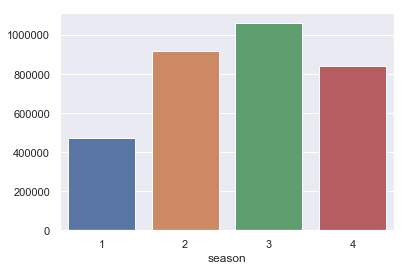

In [9]:
# Display count by season
count_users_by(df, 'season')

yr
0    1243103
1    2049576
Name: cnt, dtype: int64

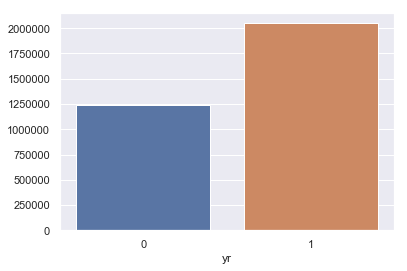

In [10]:
# Display count by year
count_users_by(df, 'yr')

mnth
1     134933
2     151352
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

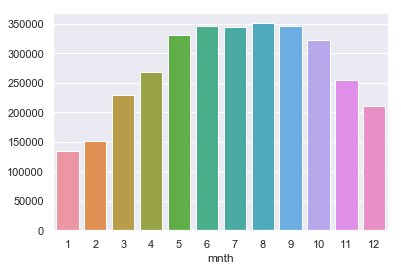

In [11]:
# Display count by month
count_users_by(df, 'mnth')

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

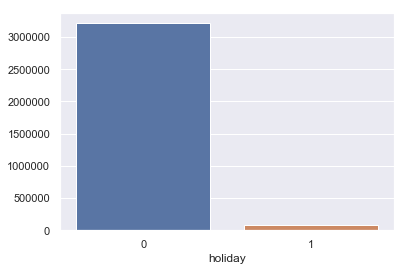

In [12]:
# Display count by holiday (0) / working day (1)
count_users_by(df, 'holiday')

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

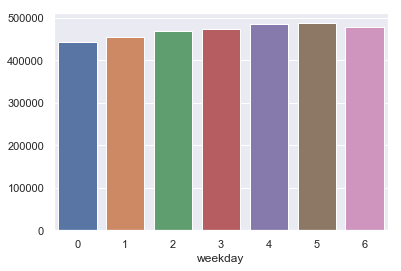

In [13]:
# Display count by weekday
count_users_by(df, 'weekday')

weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64

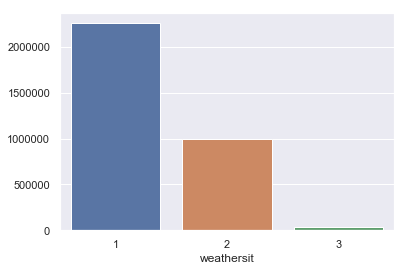

In [14]:
# Display count by weather type
count_users_by(df, 'weathersit')

In [15]:
# Check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
# Identify columns of interest for feature set
columns_of_interest = df.columns.difference(['instant', 'dteday', 'workingday', 'casual', 'registered']).tolist()
df_features = df[columns_of_interest]
# Define target and feature variables
target = ['cnt']
features = df_features.columns.difference(['cnt']).tolist()
y = df[target]
X = df_features[features]

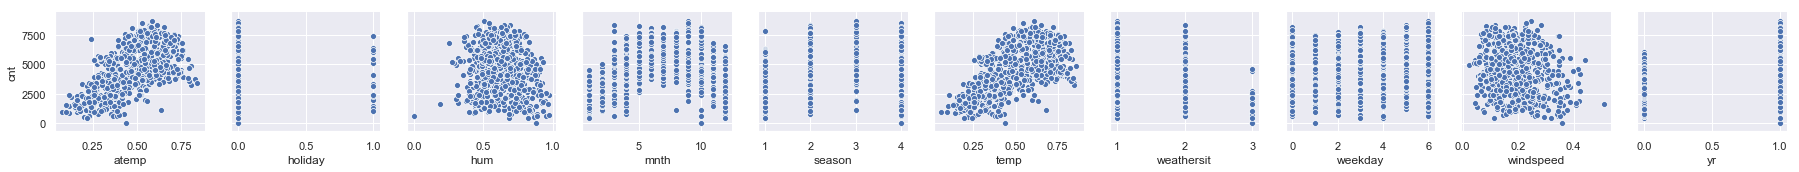

In [17]:
# Pairplot each independent variable against the dependent variable
sns.pairplot(data=df_features, y_vars=target, x_vars=features);

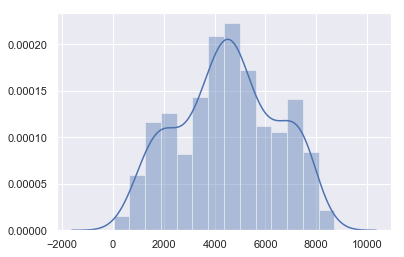

In [18]:
# Distribution of target variable
sns.distplot(y);

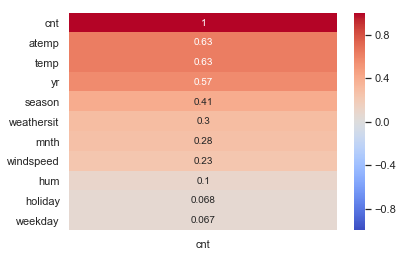

In [19]:
# Discover how feature variables correlate to target
df_corr_abs = df_features.corr()[target].abs().sort_values(target, ascending=False)
#plt.figure(figsize=(8, 8))
sns.heatmap(df_corr_abs, cmap='coolwarm', annot=True, vmin=-1, vmax=1);

In [20]:
# Summary statistics of features
X.describe()

,atemp,holiday,hum,mnth,season,temp,weathersit,weekday,windspeed,yr
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.474354,0.028728,0.627894,6.519836,2.496580,0.495385,1.395349,2.997264,0.190486,0.500684
std,0.162961,0.167155,0.142429,3.451913,1.110807,0.183051,0.544894,2.004787,0.077498,0.500342
min,0.079070,0.000000,0.000000,1.000000,1.000000,0.059130,1.000000,0.000000,0.022392,0.000000
25%,0.337842,0.000000,0.520000,4.000000,2.000000,0.337083,1.000000,1.000000,0.134950,0.000000
50%,0.486733,0.000000,0.626667,7.000000,3.000000,0.498333,1.000000,3.000000,0.180975,1.000000
75%,0.608602,0.000000,0.730209,10.000000,3.000000,0.655417,2.000000,5.000000,0.233214,1.000000
max,0.840896,1.000000,0.972500,12.000000,4.000000,0.861667,3.000000,6.000000,0.507463,1.000000


In [21]:
# Summary statistic of target
y.describe()

,cnt
count,731.000000
mean,4504.348837
std,1937.211452
min,22.000000
25%,3152.000000
50%,4548.000000
75%,5956.000000
max,8714.000000


### Hourly dataset 

In [22]:
# Set parameters for plotting
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 15),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [23]:
# Read in hourly dataset
hour_df = pd.read_csv('../data/hour.csv')

In [24]:
# Rename columns to more descriptive names
hour_df.rename(columns={'instant':'rec_id',
                      'dteday':'datetime',
                      'holiday':'is_holiday',
                      'workingday':'is_workingday',
                      'weathersit':'weather_condition',
                      'hum':'humidity',
                      'mnth':'month',
                      'cnt':'total_count',
                      'hr':'hour',
                      'yr':'year'},inplace=True)

In [25]:
# Date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# Categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

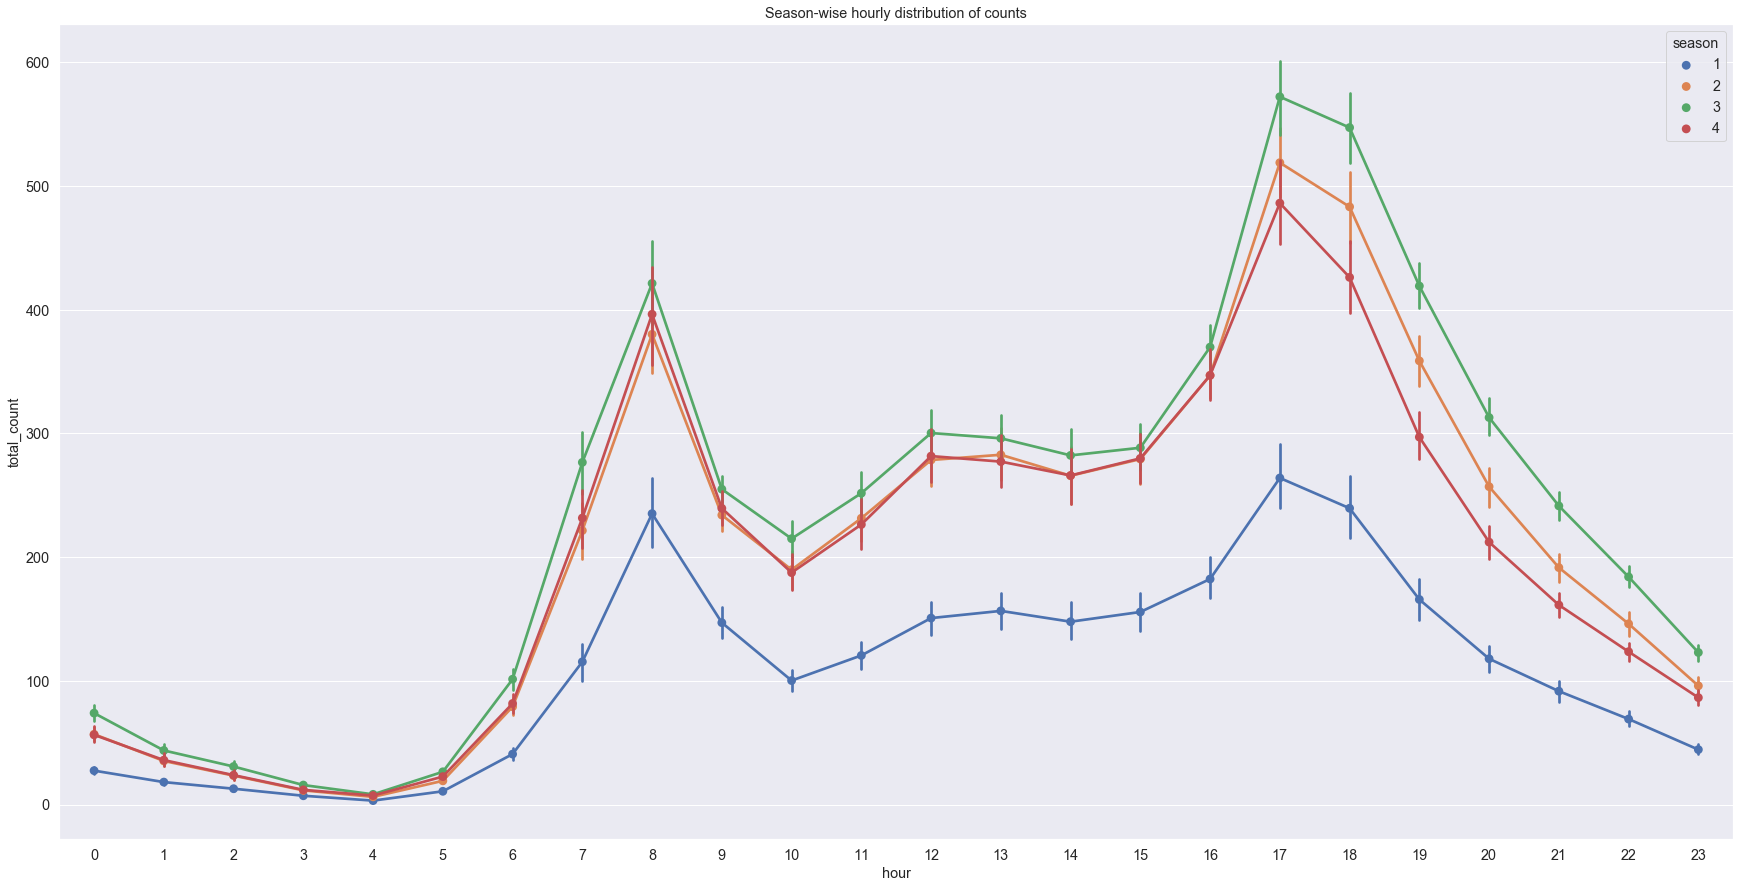

In [26]:
# Season-wise hourly distribution
fig, ax = plt.subplots()
sns.pointplot(data=hour_df[['hour', 'total_count', 'season']], x='hour', y='total_count', hue='season', ax=ax)
ax.set(title="Season-wise hourly distribution of counts");

Legend (seasons):   
- 1: Spring  
- 2: Summer  
- 3: Fall  
- 4: Winter  

Insight: 
- The above graph indicates peaks during the start and end of office hours (8am and 5pm respectively). 
- In addition, there is higher usage during the latter half of the day.

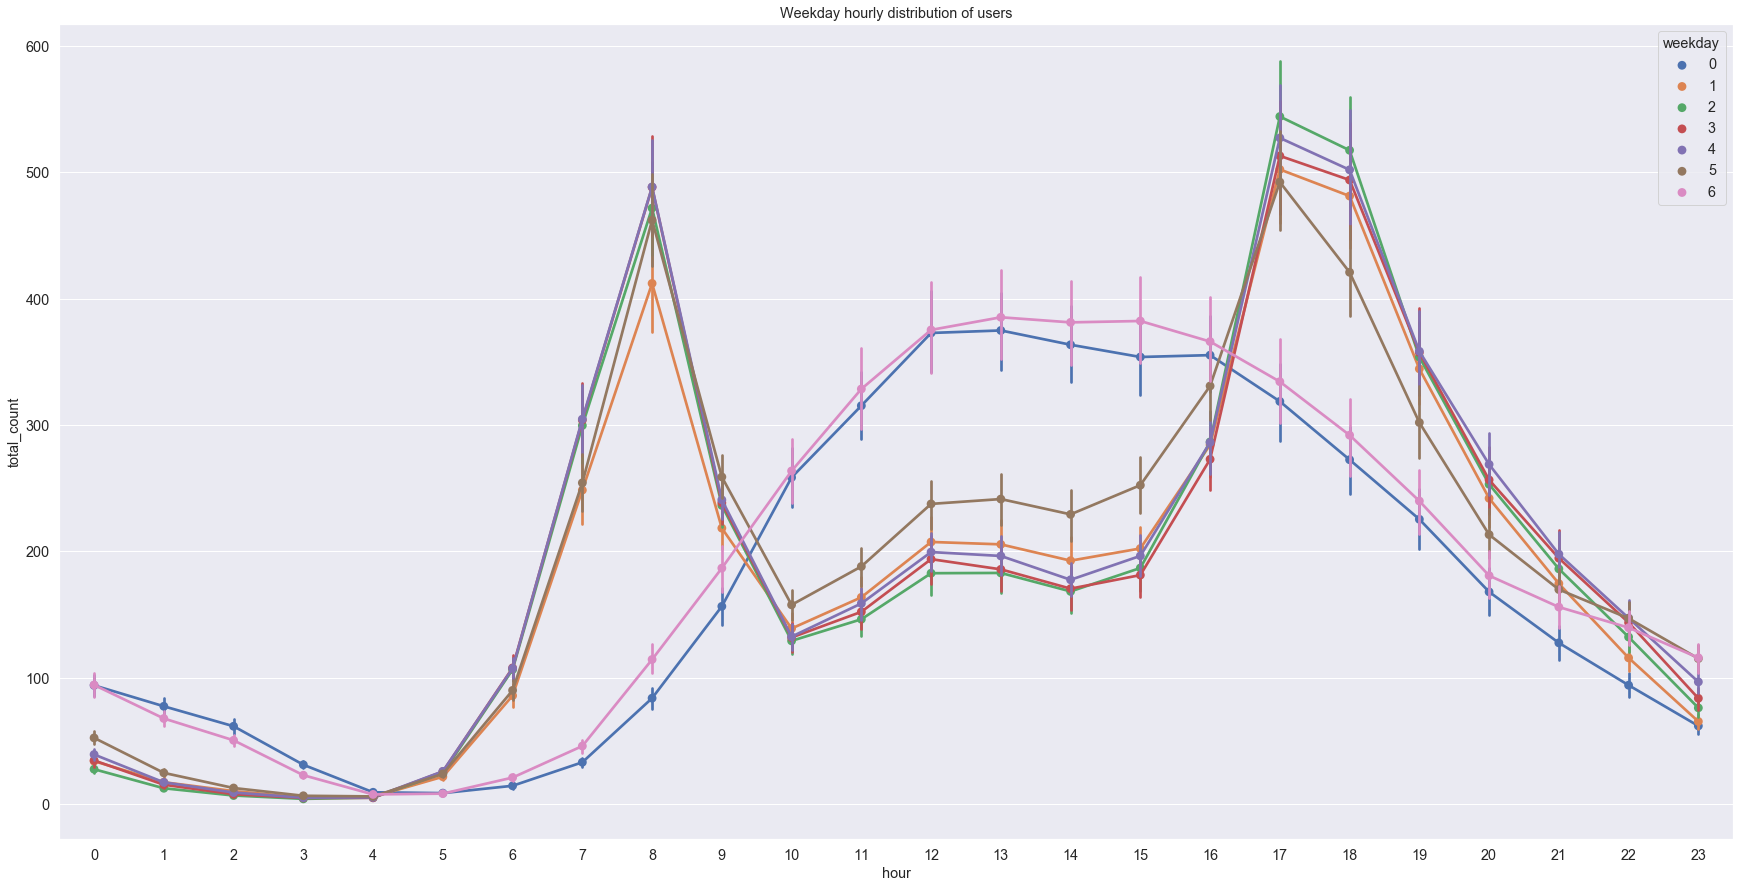

In [27]:
# Weekday hourly distribution of users
fig, ax = plt.subplots()
sns.pointplot(data=hour_df[['hour','total_count','weekday']], x='hour', y='total_count', hue='weekday', ax=ax)
ax.set(title="Weekday hourly distribution of users");

Legend (seasons):   
- 0: Sunday  
- 1: Monday  
- 2: Tuesday  
- 3: Wednesday 
- 4: Thursday  
- 5: Friday  
- 6: Saturday 

Insight: 
- The above graphy indicates a distinct difference between weekday and weekend usage patterns.
- Weekends peak during the middle of the day and have higher usage in the afternoons.

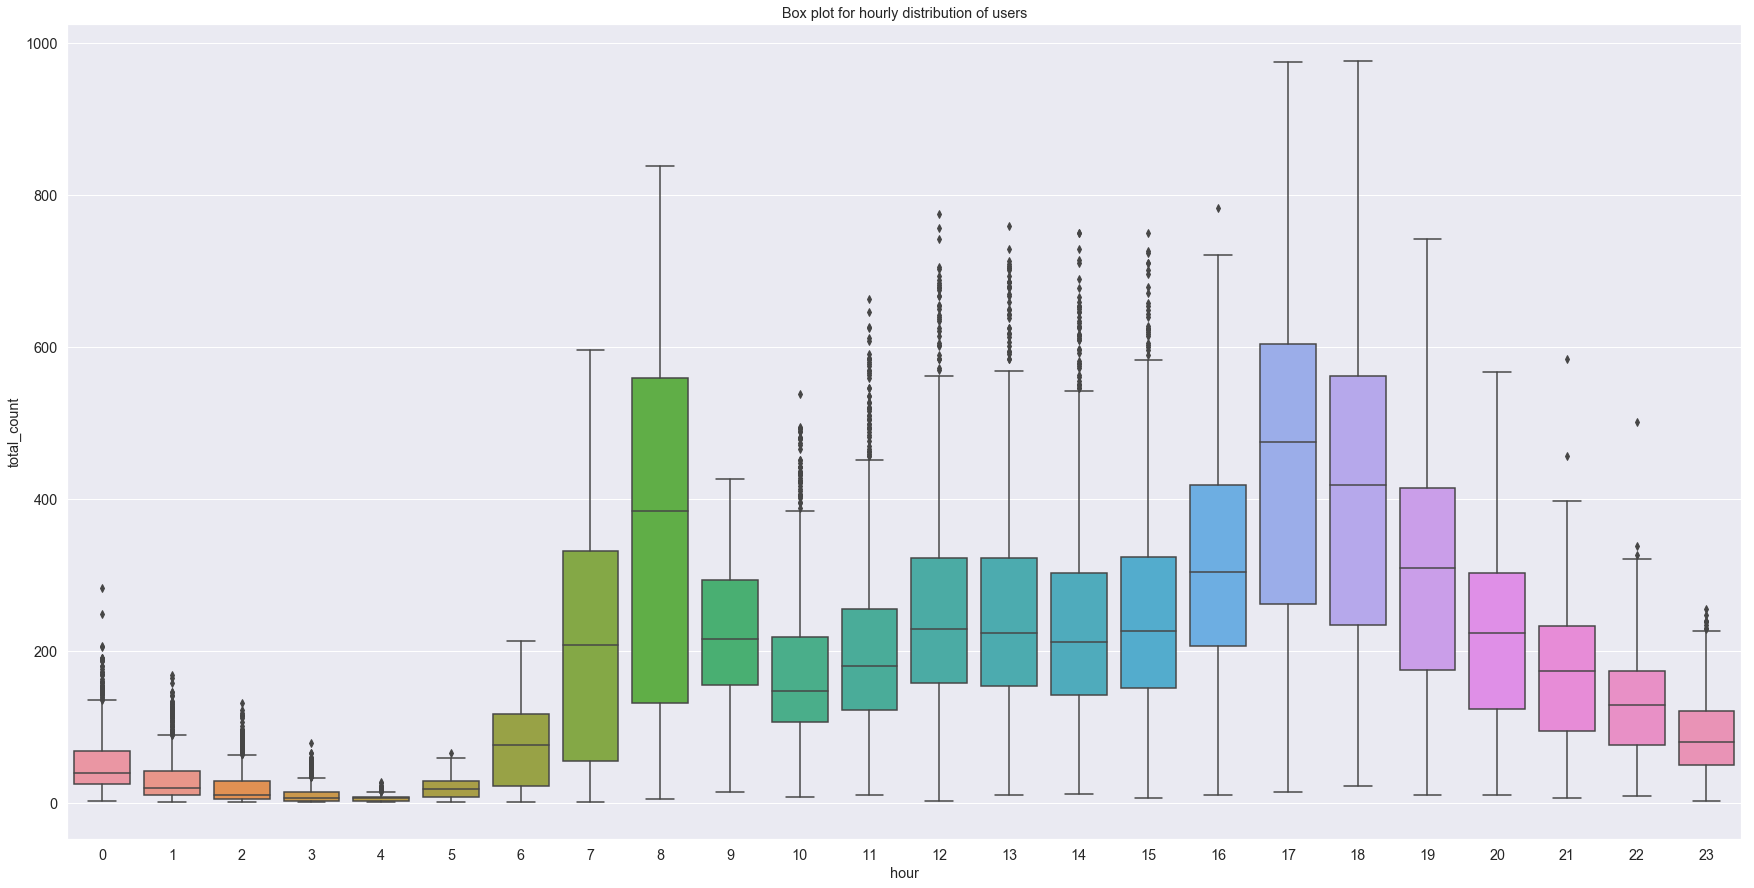

In [28]:
# Hourly distribution of users
fig, ax = plt.subplots()
sns.boxplot(data=hour_df[['hour','total_count']], x="hour", y="total_count", ax=ax)
ax.set(title="Box plot for hourly distribution of users");

Insight:
- As expected, daytime hours have higher usage than nightime. However, nightime hours have significant outliers.
- Likewise with afternoon hours in terms of outliers.
- There is more consistency with peak hours (beginning and end of the work day) with limited outliers.

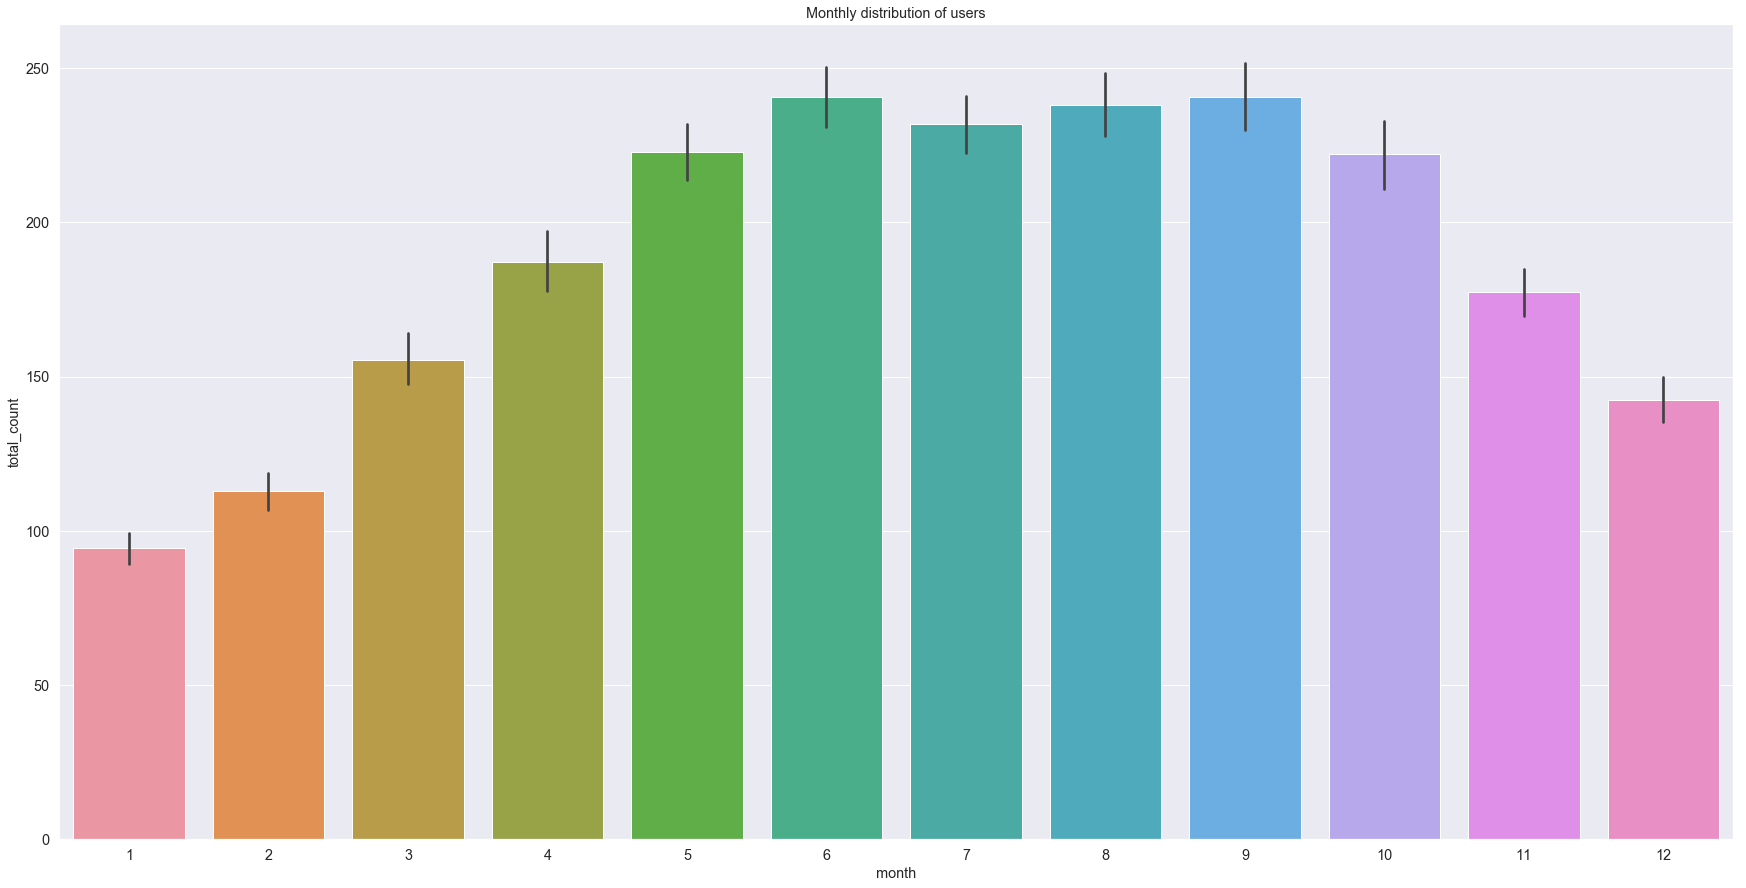

In [29]:
# Monthly distribution of users
fig, ax = plt.subplots()
sns.barplot(data=hour_df[['month', 'total_count']], x="month", y="total_count")
ax.set(title="Monthly distribution of users");

Insight:
- Much higher counts during presumably higher temperature months (June till September)
- Dramatic drop in usage during winter (less than half)

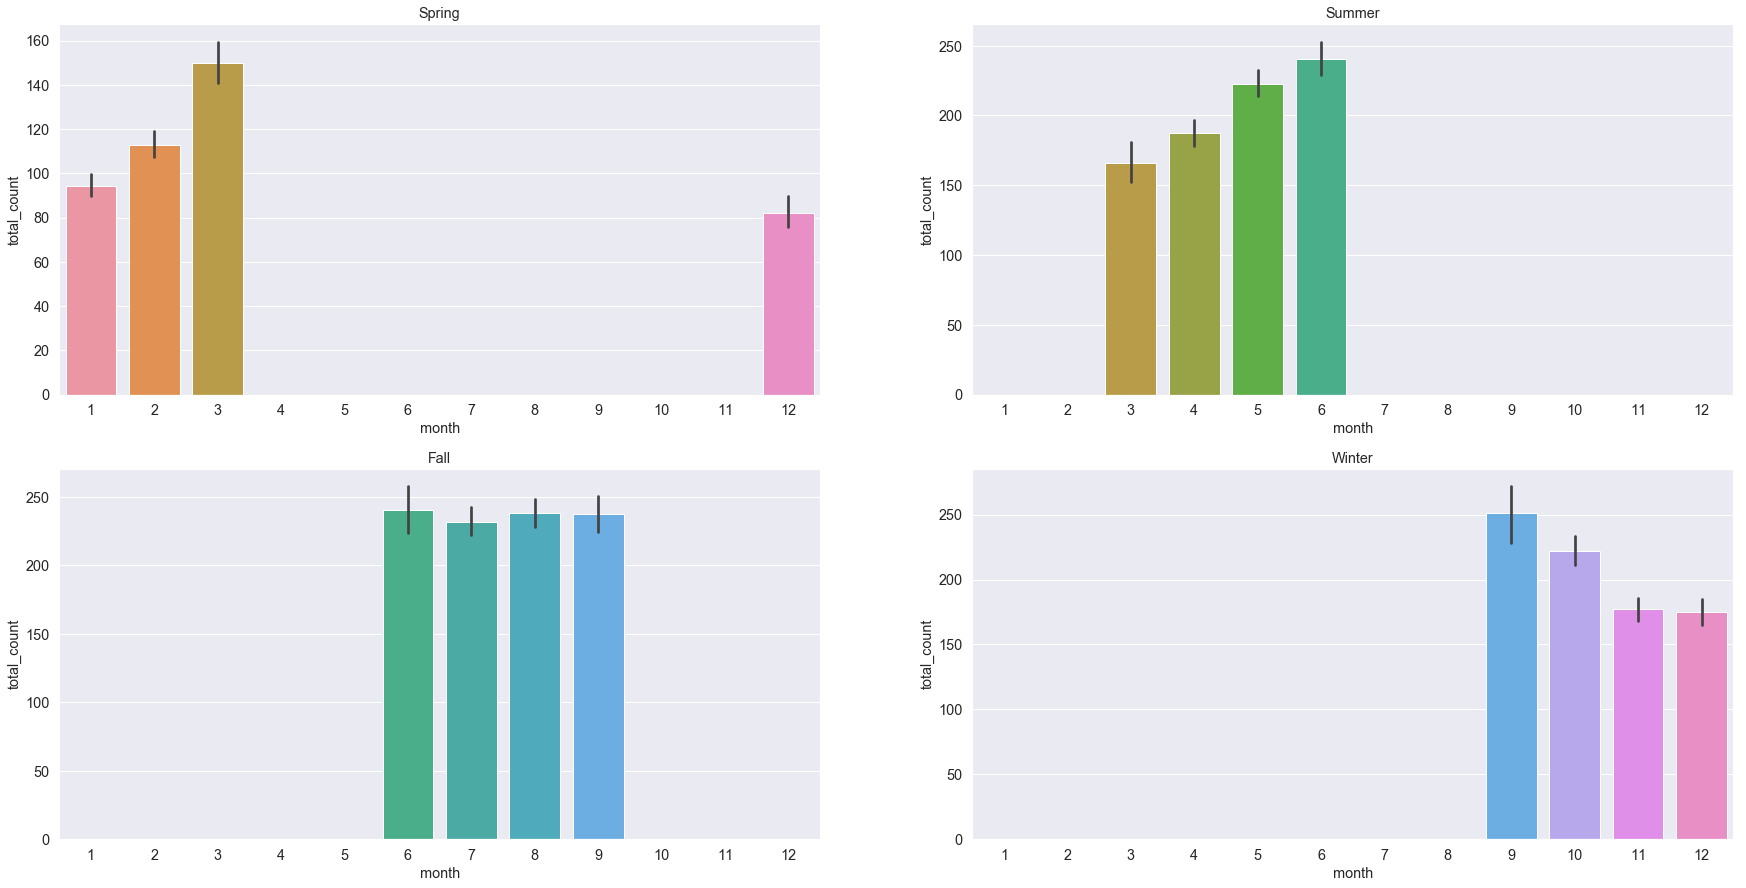

In [30]:
# Season-wise analysis
df_col_list = ['month','weekday','total_count']
plot_col_list= ['month','total_count']
spring_df = hour_df[hour_df.season==1][df_col_list]
summer_df = hour_df[hour_df.season==2][df_col_list]
fall_df = hour_df[hour_df.season==3][df_col_list]
winter_df = hour_df[hour_df.season==4][df_col_list]

fig,ax= plt.subplots(nrows=2,ncols=2)
sns.barplot(data=spring_df[plot_col_list], x="month", y="total_count", ax=ax[0][0],)
ax[0][0].set(title="Spring")

sns.barplot(data=summer_df[plot_col_list], x="month", y="total_count", ax=ax[0][1])
ax[0][1].set(title="Summer")

sns.barplot(data=fall_df[plot_col_list], x="month", y="total_count", ax=ax[1][0])
ax[1][0].set(title="Fall")

sns.barplot(data=winter_df[plot_col_list], x="month", y="total_count", ax=ax[1][1])  
ax[1][1].set(title="Winter");

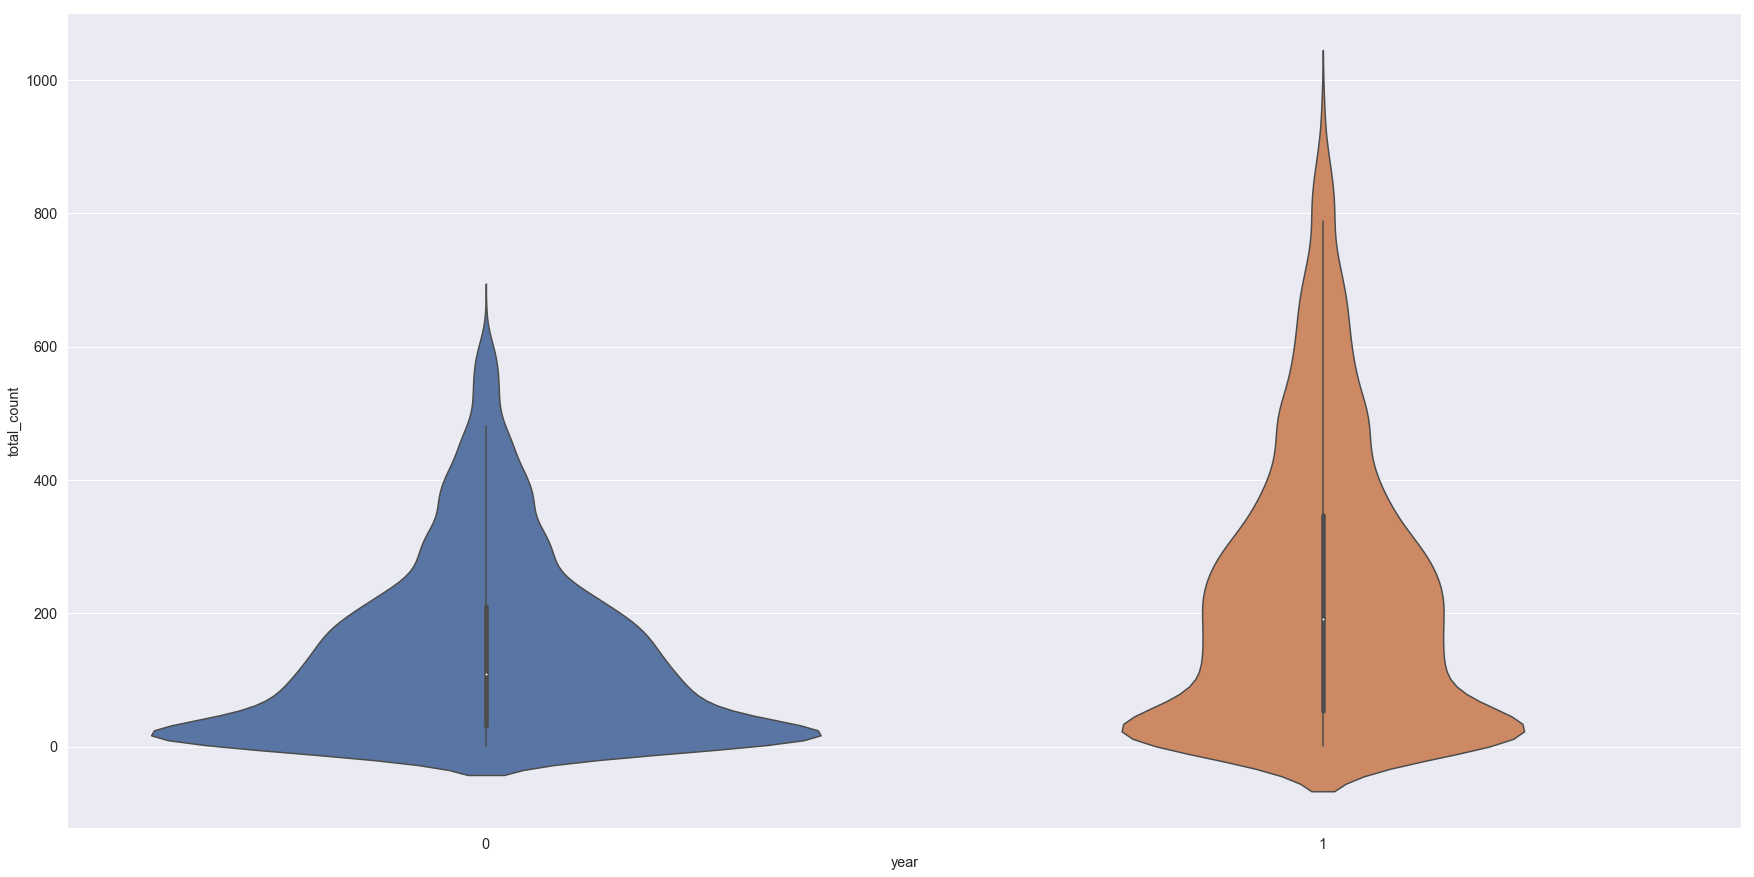

In [31]:
# Year-wise distribution of users
sns.violinplot(data=hour_df[['year', 'total_count']], x="year", y="total_count");

Insight:
- Year 0 has fewer users than year 1.

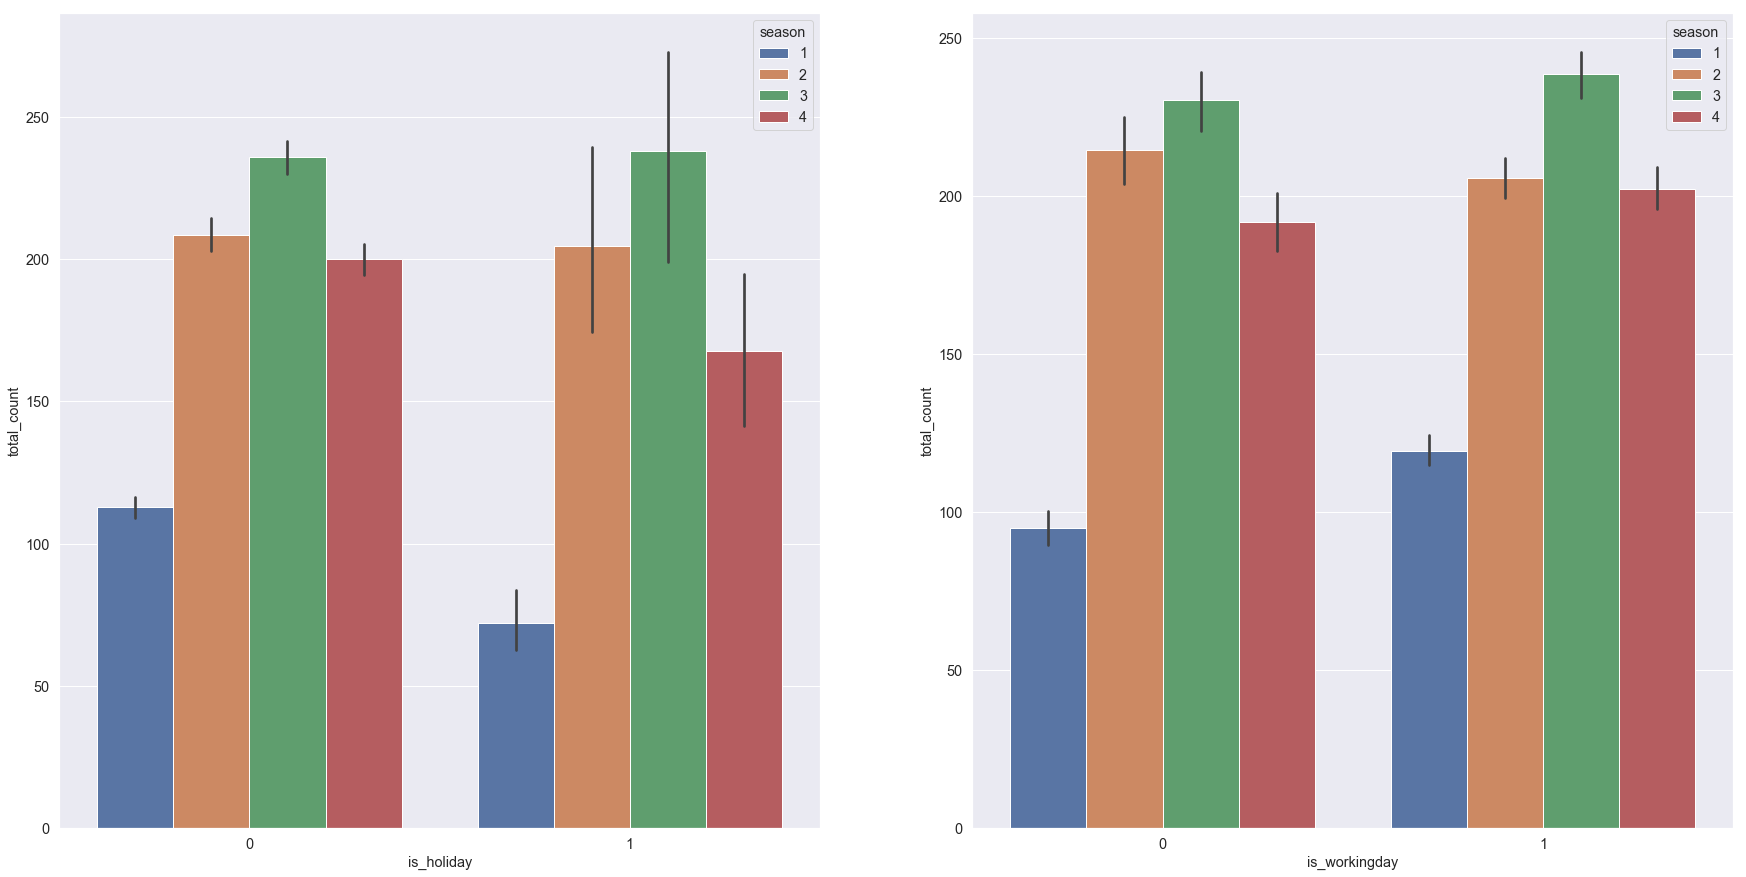

In [32]:
# Working day vs holiday distributions
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.barplot(data=hour_df,x='is_holiday', y='total_count', hue='season',ax=ax1)
sns.barplot(data=hour_df,x='is_workingday', y='total_count', hue='season',ax=ax2);

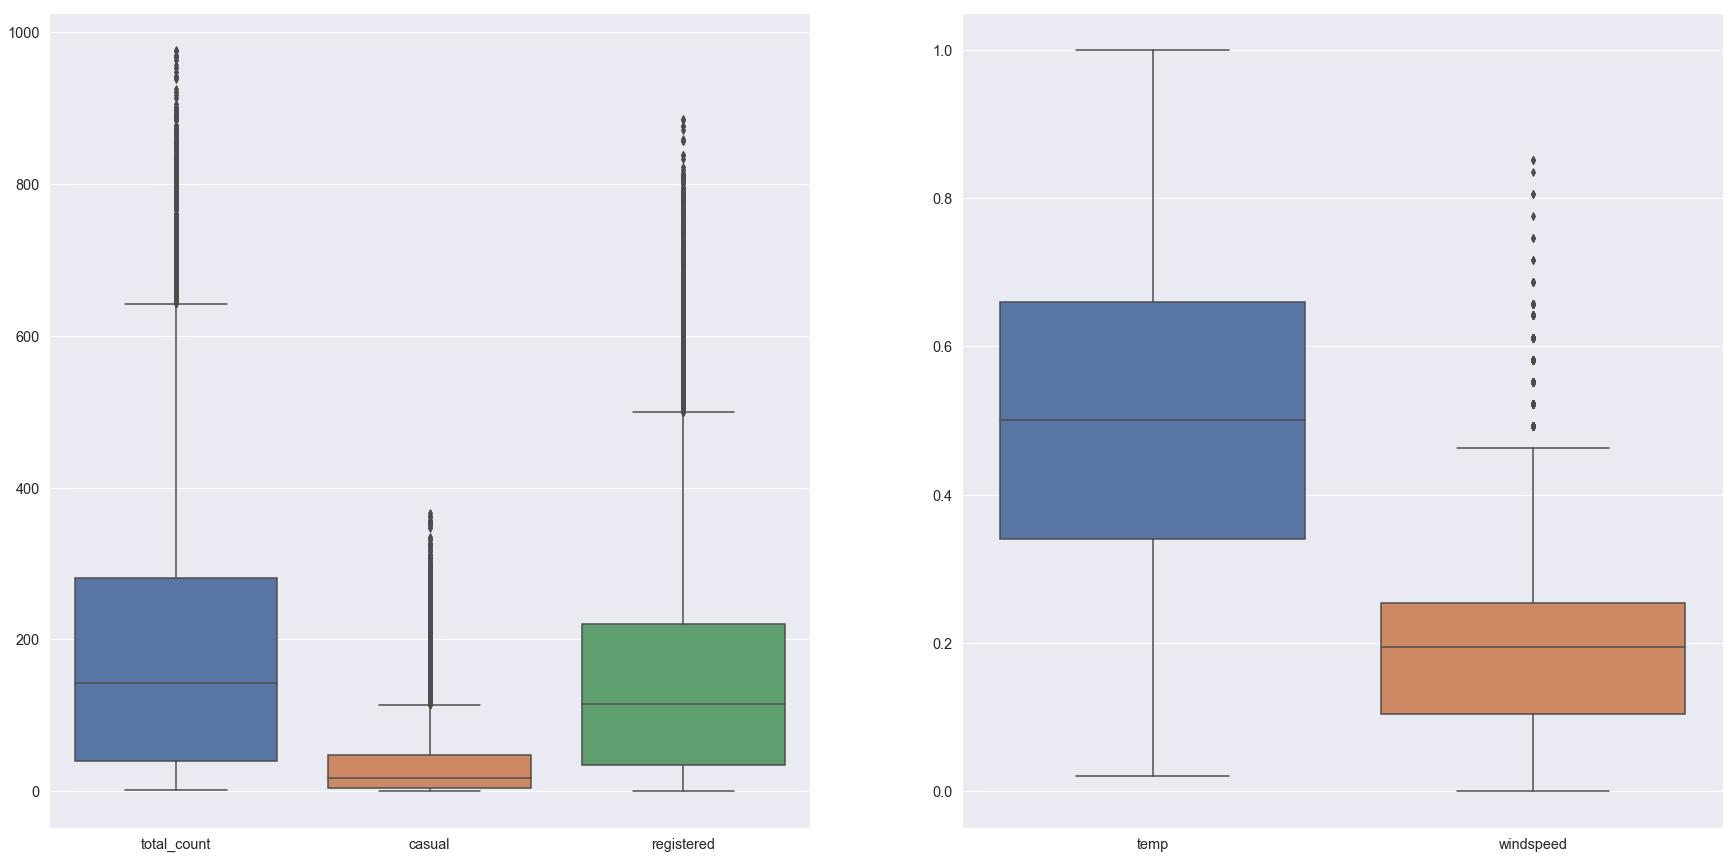

In [33]:
# Boxplots for type of user, temperature, and windspeed.
fig, (ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=hour_df[['total_count', 'casual','registered']], ax=ax1)
sns.boxplot(data=hour_df[['temp','windspeed']], ax=ax2);

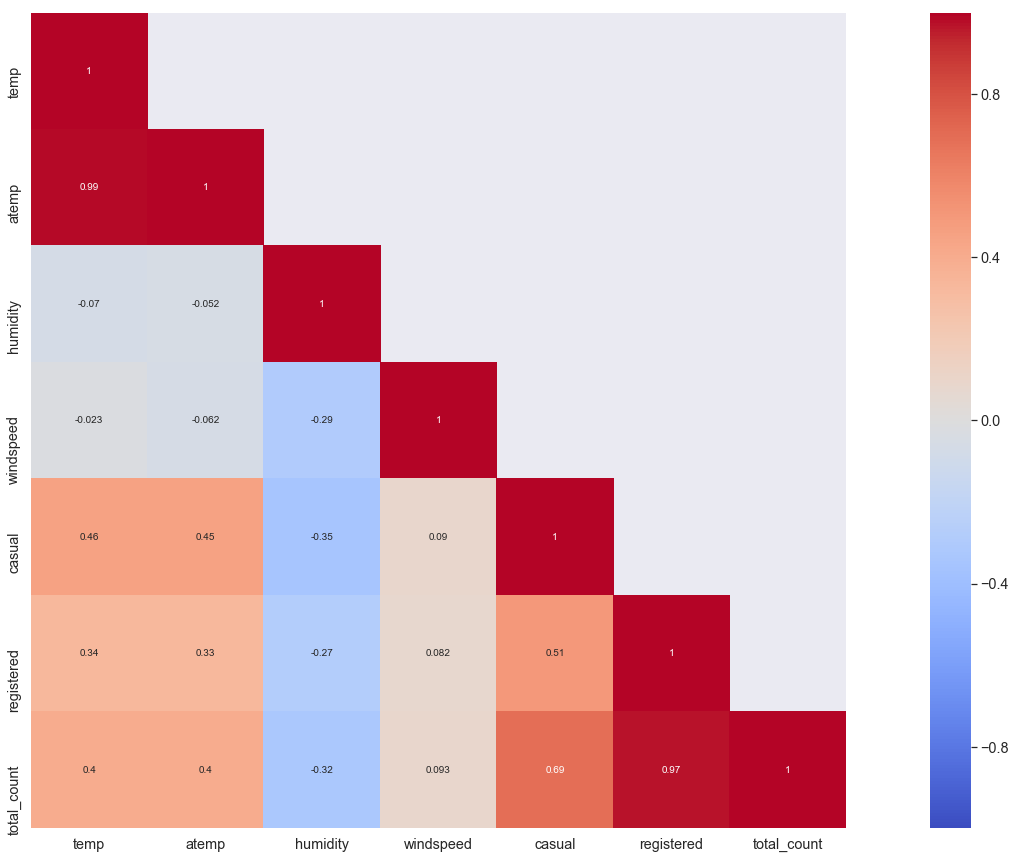

In [34]:
# Multicollinearity between variables
corr_matrix = hour_df[["temp","atemp", "humidity","windspeed", "casual","registered", "total_count"]].corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, square=True, annot=True, cmap='coolwarm');

Insight:
- Very high correlation between temp and atemp (0.99) and between total users and registered users (0.97).
- Generally, not very high correlations between variables.